What this notebook does:

Narrow down the datasets to actual shops that have a focus on coffee.  I use the fraction of reviews mentioning coffee (./ProcessedData/freqcoffeeterms_reviews.csv) to assess this.  I set a cutoff using the fraction of coffee mentions in Starbucks.  Finally for future convenience, I add a label variable to the data frame for the top 5 coffee shops.The narrowed list of reviews and shops is saved in '/ProcessedData/coffeeshops_withcfcutoff.csv'

Coffee shop data has already been annotated with NTA and Yelp category information (See '/PreProcessingRawYelpData/EDAandDataCleaning.ipynb')

Geographic distribution as well as distributions of the Yelp rating, number of reviews, number of locations of the businesses are tabulated and visualized.


In [1]:
#Step one directory up to access the yelp scraping function in the helper_functions module
import os
print(os.getcwd())
os.chdir('../')
os.getcwd()

/Users/thomasyoung/Dropbox/TYInsightProject/ProcessingRawYelpData


'/Users/thomasyoung/Dropbox/TYInsightProject'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes

#For creating interactive maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#Let's look at the distribution of the coffee shops on a map
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [11]:
csfreqsumm = pd.read_csv('./ProcessedData/freqcoffeeterms_reviews.csv')
shops = pd.read_csv('./ProcessedData/shops_withcategoriesgeoms.csv')
print(csfreqsumm.shape)
print(shops.shape)


#Joining based on the name of the coffee shop, so different locations have the same name
shops = pd.merge(shops,csfreqsumm,how='inner',on = ['alias'])
print(shops.shape)
print(shops['ntacode'].value_counts())


(1469, 4)
(1437, 20)
(1414, 23)
MN17    277
MN24    134
MN13    121
MN23    120
MN25    102
MN19    101
MN27     62
MN22     60
MN20     55
MN15     54
MN40     51
MN12     42
MN31     35
MN32     32
MN14     30
MN09     25
MN21     22
MN33     20
BK38     18
MN34     12
MN28     10
BK09     10
QN31      6
MN50      5
MN11      5
QN68      3
BK76      1
QN71      1
Name: ntacode, dtype: int64


In [5]:
#Removing coffeeshops with fewer than 15 reviews scraped from yelp. 
#This leaves '615' coffee shops in our dataset
shops = shops[shops.numreviews>=15]

0.0


Text(456.8823529411765, 0.5, 'Yelp rating')

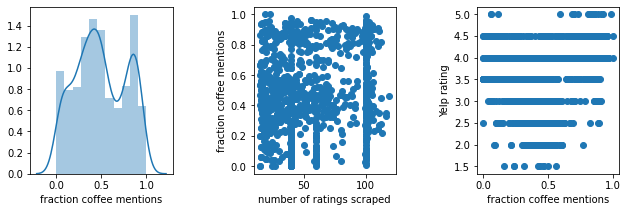

In [6]:
#Visualizing the distribution of the coffee-mention fraction
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))
fig.tight_layout(pad=5)

sns.distplot(shops.fraccof,ax=axs[0])
axs[0].set_xlabel('fraction coffee mentions')

print(min(shops.fraccof))
axs[1].scatter(x= shops.numreviews,y=shops.fraccof)
axs[1].set_xlabel('number of ratings scraped')
axs[1].set_ylabel('fraction coffee mentions')


axs[2].scatter(x = shops.fraccof, y = shops.rating)
axs[2].set_xlabel('fraction coffee mentions')
axs[2].set_ylabel('Yelp rating')

The effect of the discrete nature of reviews on fraction is pretty obvious at smaller total numbers of reviews (middle graph). (Right graph) For coffee shops in which there is a higher frequency of coffee mentions, the lower end of mean ratings also increases. One possible explanation is that at places that focus on coffee and draw customers focused on coffee, the customers know what to expect.  For places with very few mentions of coffee (< 0.1), the ratings also appear to be higher)

(Left plot), There appear to be peaks for the mentions of coffee in reviews. The middle peak has a sharp dropoff above 0.5.  There is also a sharp peak at 0.9. Could these represent different strategies for targeting customers - A diversified approach and a coffee-focused approach (along with drawing coffee focused vs generalist customers)? Starbucks clearly falls in the middle category.

0.2


Text(456.8823529411765, 0.5, 'Yelp rating')

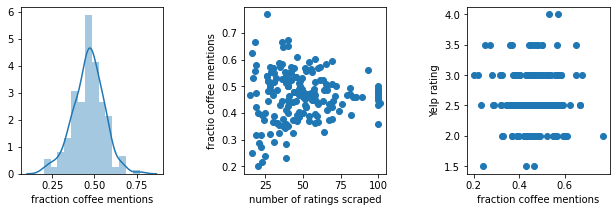

In [7]:
#Use fraction of coffee shop mentions in Starbucks reviews to come up with a cutoff for coffeeshop mentions
sb = shops[shops.name=='Starbucks']
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))
fig.tight_layout(pad=5)

sns.distplot(sb.fraccof,ax=axs[0])
axs[0].set_xlabel('fraction coffee mentions')

print(min(sb.fraccof))
axs[1].scatter(x= sb.numreviews,y=sb.fraccof)
axs[1].set_xlabel('number of ratings scraped')
axs[1].set_ylabel('fractio coffee mentions')


axs[2].scatter(x = sb.fraccof, y = sb.rating)
axs[2].set_xlabel('fraction coffee mentions')
axs[2].set_ylabel('Yelp rating')



0.7058823529411765


Text(0, 0.5, 'Yelp rating')

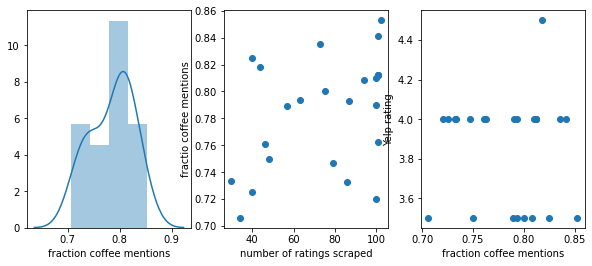

In [8]:
#Plotting the same distributions for Gregory's Coffee (Fraction of reviews mentioning coffee)
sb = shops[shops.name=="Gregorys Coffee"]
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))


sns.distplot(sb.fraccof,ax=axs[0])
axs[0].set_xlabel('fraction coffee mentions')

print(min(sb.fraccof))
axs[1].scatter(x= sb.numreviews,y=sb.fraccof)
axs[1].set_xlabel('number of ratings scraped')
axs[1].set_ylabel('fractio coffee mentions')


axs[2].scatter(x = sb.fraccof, y = sb.rating)
axs[2].set_xlabel('fraction coffee mentions')
axs[2].set_ylabel('Yelp rating')


In [10]:
#Counting chain shops
print(shops.shape)
print(shops.name.value_counts().head(20))
#There are no duplicate shops
print(shops.id.value_counts().head(5))

(1076, 23)
Starbucks                 184
Dunkin'                    78
Pret A Manger              45
Le Pain Quotidien          24
Gregorys Coffee            24
Bluestone Lane             16
JOE & THE JUICE            14
Joe Coffee Company         11
Blue Bottle Coffee         11
Matto Espresso              9
Paris Baguette              8
La Colombe Coffee           8
Birch Coffee                7
Think Coffee                7
Kung Fu Tea                 7
Van Leeuwen Ice Cream       6
Maison Kayser               5
CoCo Fresh Tea & Juice      5
Oren's Daily Roast          4
Ground Central              4
Name: name, dtype: int64
LzxMKnP0Zf5XoRC1VInCZg    1
8Qe6g3Dv5NXN1Zq-egJk9w    1
1Mqydw0kcU_dgRgsWpo_7g    1
nMrv9mO5XSdsSO2wYZ-B-A    1
3erDg5x5OYgJjaPkV_ysLw    1
Name: id, dtype: int64


### Before saving, I add a new label variable for top 5 coffee shops for convenience.


other                721
Starbucks            184
Dunkin'               78
Pret A Manger         45
Le Pain Quotidien     24
Gregorys Coffee       24
Name: name_top5count, dtype: int64


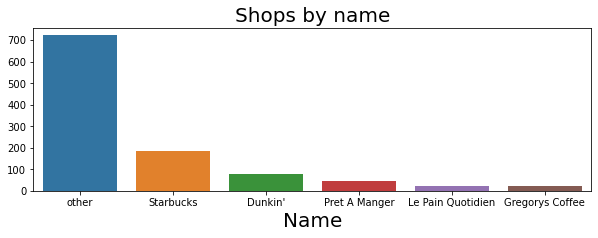

In [46]:
#Let's label the top 5 most abundant shops
manyloc = shops.name.value_counts().head(5).index.to_list()
manyloc

shops['name_top5count'] = shops.name.copy()

shops.loc[~shops['name_top5count'].isin(manyloc),'name_top5count'] = 'other'
shops['name_top5count'].value_counts()

namevc = shops['name_top5count'].value_counts()
print(namevc)
fig,ax = plt.subplots(1,1,figsize=(10,3))
sns.barplot(x=namevc.index,y=namevc,ax=ax)
ax.set_xlabel('Name',fontsize=20)
ax.set_title('Shops by name',fontsize=20)
ax.set_ylabel('')
fig.savefig('./Figures/EDA/shopsbyname.png',bbox_inches='tight')




In [47]:
#Removing all shops with coffee mentioned in less than 30% of reviews.  
#We only care about coffeeshops where coffee is mentioned as much as at Starbucks.
shops = shops[shops.fraccof >= 0.29]
shops.to_csv('./ProcessedData/coffeeshops_withcfcutoff.csv',index=False)



The good things is that now, places like McDonald's and 7-11 are no longer on the list. We have places whose main focus is on selling coffee.

### Visualizing coffee shops on map and EDA

In [48]:
full_data = gpd.read_file("./BoroughBoundaries/geo_export_95c5197b-fade-4aaa-afbb-4566e043f401.shp")
type(full_data)
print(full_data.total_bounds)
print(full_data.crs)


[-74.25559136  40.4961154  -73.70000906  40.91553278]
epsg:4326


Plotting the coffee related businesses on the map

In [49]:
ax = full_data.plot(figsize=(10,10),color='none',edgecolor='gainsboro')
ax.set_xlim(-74.03, -73.925)
ax.set_ylim(40.7, 40.78)

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(shops.longitude, shops.latitude)]
shopsgdf = gpd.GeoDataFrame(shops,geometry=geometry)
shopsgdf.crs = crs
shopsgdf.plot(color='maroon',markersize=1,ax=ax)
#ax.set_title('Coffeeshop dataset')

/Users/thomasyoung/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Most coffee related businesss are cheap

$$     0.563172
$      0.430108
$$$    0.006720
Name: price, dtype: float64

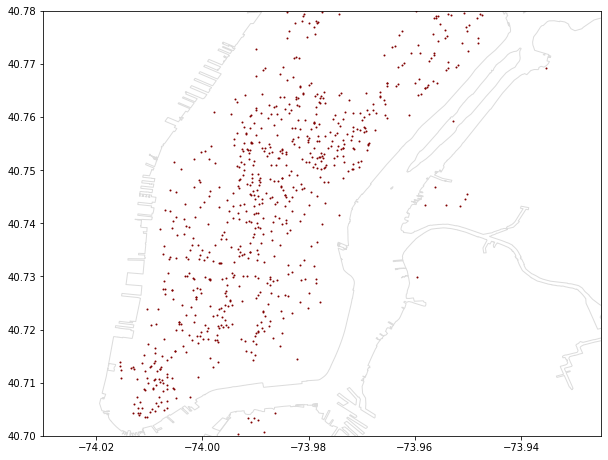

In [50]:
shops.price.value_counts()/sum(shops.price.value_counts())

About 45% have an average rating > 4. 60% have a rating over 3.5.

1.5    0.010114
2.0    0.065740
2.5    0.154235
3.0    0.131479
3.5    0.154235
4.0    0.295828
4.5    0.164349
5.0    0.024020
Name: rating, dtype: float64


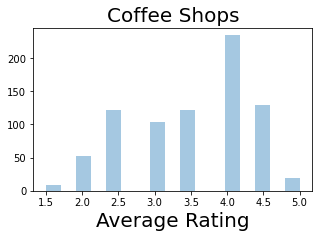

In [51]:
print(shops.rating.value_counts().sort_index()/sum(shops.rating.value_counts()))
fig,ax = plt.subplots(1,1,figsize=(5,3))
sns.distplot(shops.rating,kde=False,ax=ax)
ax.set_title('Coffee Shops',fontsize=20)
ax.set_xlabel('Average Rating',fontsize=20)
fig.savefig('./Figures/EDA/shopratings.png', bbox_inches='tight')

All shops are opened

In [52]:
shops.is_closed.value_counts()

False    791
Name: is_closed, dtype: int64

There is a single peak for number of yelp reviews at about 120.  THis is the average.  There is some skew in the tail

127.33628318584071

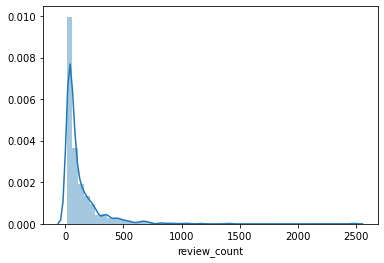

In [53]:
sns.distplot(shops.review_count)
np.mean(shops.review_count)


As expected from statistics, when there are fewere reviews, there is more variability in the average rating. At the same we we would expected more reviews to correlate with higher ratings, since higher ratings can help to drive business.

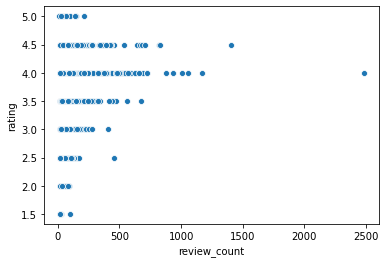

In [54]:
sns.scatterplot(x=shops.review_count,y=shops.rating)

Creating an interactive map with folium

In [55]:
#Plotting individual coffeeshops color coded by review
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13)

#add shops to the map, color coded by price
for i in range(0,len(shops)):
    Circle(
        location=[shops.iloc[i]['latitude'],shops.iloc[i]['longitude']],
        radius = 20, 
        color = 'red').add_to(m_1)
    
#display the map
m_1



In [56]:
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13)

#add shops to the map, color coded by price

def color_producer(val):
    if val == '$':
        return 'yellow'
    if val == '$$':
        return 'darkred'
    if val == '$$$':
        return 'black'
    if val == '$$$$':
        return 'blue'
    
for i in range(0,len(shops)):
    Circle(
        location=[shops.iloc[i]['latitude'],shops.iloc[i]['longitude']],
        radius = 20, 
        color = color_producer(shops.iloc[i]['price'])).add_to(m_1)
    
#display the map
m_1



Based on the names, it looks like for some businesses, coffee is one of several focuses (Van Leeuwen Ice Cream and 7-eleven).  W
One related factor is the category of a shop. It tells roughly what the shop sells. A propsective coffee shop owner might be curious whether selling coffee with something else is common in a particular area.  That migh be something to account for in a particular area. We can use the number of factors to assess what places are truly coffee shops.

In [57]:
shops.columns

Index(['id', 'name', 'alias', 'is_closed', 'review_count', 'price', 'rating',
       'transactions', 'latitude', 'longitude', 'geometry', 'index_right',
       'boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'catlist', 'numcoffeemen', 'numreviews',
       'fraccof', 'name_top5count'],
      dtype='object')

In [58]:
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13)

#add shops to the map, color coded by price
import branca

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 100)    
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 100)    
    
for i in range(0,len(shops)):
    Circle(
        location=[shops.iloc[i]['latitude'],shops.iloc[i]['longitude']],
        radius = 20, 
        color = colorscale(shops.iloc[i]['numreviews'])).add_to(m_1)
    
colormap.add_to(m_1)
#display the map
m_1


In [60]:
shops['ntacode'].value_counts()

MN17    148
MN24     80
MN13     72
MN23     68
MN19     55
MN25     53
MN40     39
MN22     32
MN20     30
MN15     30
MN12     25
MN27     23
MN31     22
MN32     20
MN14     19
MN21     15
MN09     13
MN33      8
BK38      8
BK09      7
QN31      6
MN28      6
MN50      4
MN34      4
MN11      2
QN71      1
BK76      1
Name: ntacode, dtype: int64